# gradient descent demo for 2019 DSPS

In [7]:
import pylab as pl
import numpy as np
%pylab inline
pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")


Populating the interactive namespace from numpy and matplotlib


In [0]:
def line (m, b, x) :
    '''makes a line with parameters slope:a, intercept:b '''
    return m * x + b

In [0]:
# creting a line
x = np.arange(3, 19, 0.1)
y = 21 * x + 10

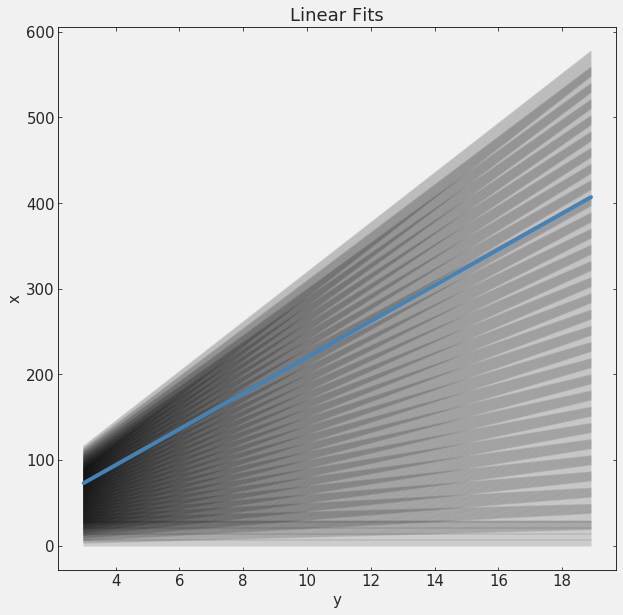

In [46]:
def loss(m, b, x, y):
    ''' L2 loss function 
    m: slope
    b: intercept
    x: data (numpy array)
    y: target (numpy array)
    ax: axis object for plot
    '''    
    return ((y - line(m, b, x))**2).sum() / x.shape[0]

res = np.zeros((30,30))
pl.figure(figsize=(10,10))
for i, m in enumerate(range(0, 30, 1)):
    for j, b in enumerate(range(0, 30, 1)):
        res[i,j] = loss(m, b, x, y)
        pl.plot(x,line(m, b, x), 'k', alpha=.1)
pl.plot(x, y, 'SteelBlue', lw=4)
pl.xlabel("y")
pl.ylabel("x")
pl.title("Linear Fits");

**Figure 1:** Line fits shown close to the actual parameters. The Parmeters of the line (slope and intercept) vary from 0 to 30 overlaying a top of the possible parameter space. The correct line plot is visualized as a blue line.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


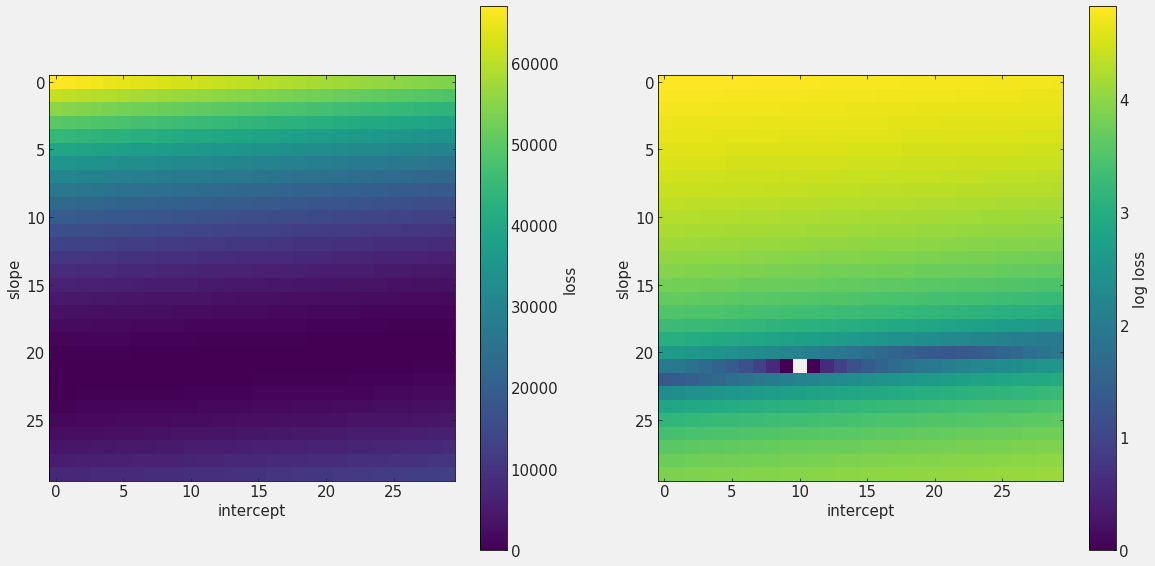

In [11]:
fig = pl.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
pl.imshow(res)
pl.colorbar(label="loss")
#pl.axis('off')
pl.xlabel("intercept")
pl.ylabel("slope");

ax2 = fig.add_subplot(122)
pl.imshow(np.log10(res))
pl.colorbar(label="log loss")
#pl.axis('off')
pl.xlabel("intercept")
pl.ylabel("slope");

**Figure 2:** Contour of loss function and contour of the log of the loss function. the white square oon the right plot represents the true minimum loss point.


In [0]:
# create the gradient descent

def gradDesc(m, b, x, y, alpha, ax=None):
    N = len(x)
    #partial derivative: -2x(y - (mx + b)), -2(y - (mx + b))
    f_m = np.sum(-2*x*(y - (m*x+b)))
    f_b = np.sum(-2*(y-(m*x+b)))
    # We subtract because the derivatives point in direction of steepest ascent
    m -= f_m / float(N) * alpha
    b -= f_b / float(N) * alpha
    #print (f_m, f_b)
    if not ax is None:
      ax.plot(m, b, 'ko', alpha=0.2)

    return m, b



Final set of parameters: m=20.998003140256284, b=10.025728463843118. This took 7039 Gradient
 Descent steps.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10


Text(0.5, 0, 'slope, m')

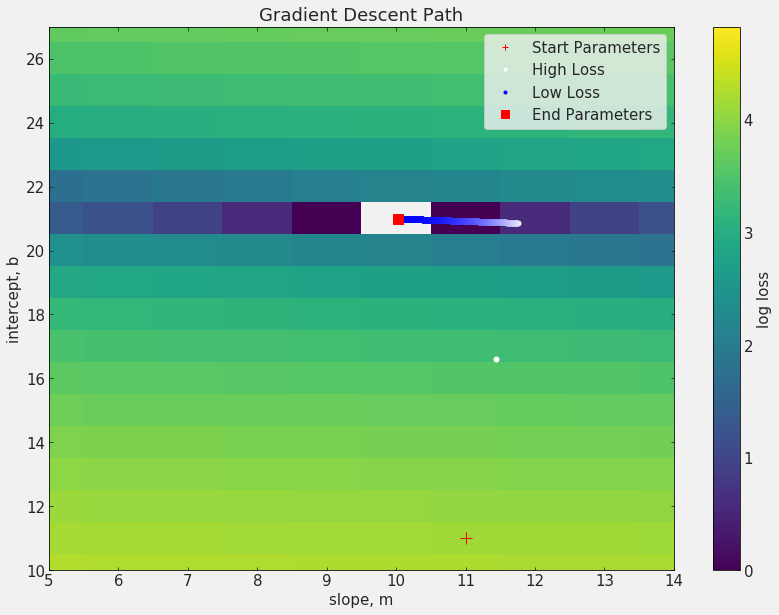

In [45]:
#initial setup
m, b = 11, 11 
mya = 0.002
losss = loss( m, b, x, y)
pl.figure(figsize = (14, 10))
pl.plot( b, m, '+', color = 'r', ms = 12, label = "Start Parameters")
np.random.seed(100)
i = 0
while losss > 0.0001:
  m, b = gradDesc( m, b, x, y, mya)
  losss = loss( m, b, x, y)
  i += 1
  if i % 10 ==1:
    ccolor = 2*max(0.5-losss,0)
    pl.plot(b, m, ".", color=(1-ccolor,1-ccolor,1), markersize=10)
    #print(f'{m:0.2f}x+\t{b:0.2f}\t\t loss =', losss)
pl.plot(b, m, 'rs', ms = 10, label = 'End Parameters')
print(f"\nFinal set of parameters: m={m}, b={b}. This took {i} Gradient\n\
 Descent steps.")

pl.imshow(np.log10(res), origin = 'lower', aspect = 'auto')
pl.xlim(5,14)
pl.ylim(10, 27)
pl.colorbar(label = "log loss")
pl.legend(handles = [Line2D([0], [0], lw = 0, marker="+", color=(1,0,0),
                          label='Start Parameters'),
                   Line2D([0], [0], lw = 0, marker=".", color=(1,1,1),
                          markersize=6, label='High Loss'),
                   Line2D([0], [0], lw = 0, marker=".", color=(0,0,1),
                          markersize=6, label='Low Loss'),
                   Line2D([0], [0], lw = 0, marker="s", color=(1,0,0),
                          markersize = 8, label='End Parameters')])
pl.title("Gradient Descent Path")
pl.ylabel("intercept, b")
pl.xlabel('slope, m')



**Figure 3:** plot showing the gradient descent. every 10th point of descent is shown on the graph. As the descent function approaches the the End parameters, the loss fuction shows smaller steps between each descent. 